In [1]:
import numpy as np
import matplotlib.pyplot as pl

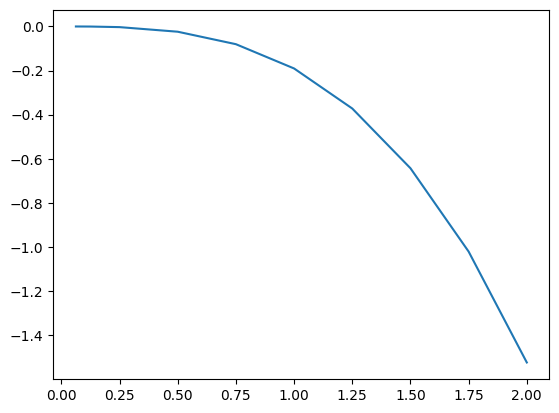

In [2]:
vel = [0.0625, 0.125, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]
beta_v = [ -0.0000465869883, -0.00037208, -0.00297619, -0.02380919, -0.08035482, -0.19047034, -0.37201215, -0.64283671, -1.02080042, -1.52375956]

pl.plot(vel, beta_v)

In [3]:
fit = np.polyfit(vel, beta_v, 3, rcond=None, full=False, w=None, cov=False)
fit

array([-1.90469450e-01, -1.06168666e-06,  1.56768043e-07, -1.05309457e-07])

Text(0.5, 0, 'v')

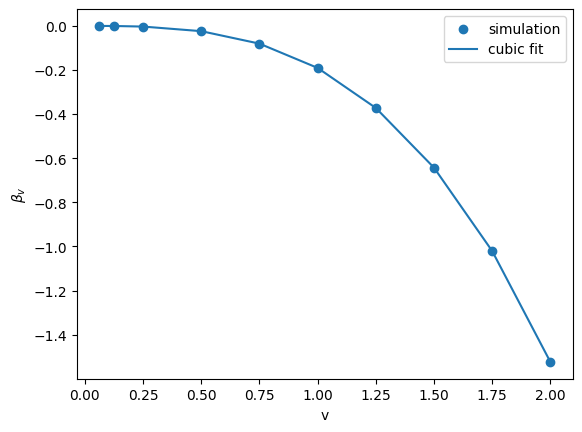

In [4]:
fitted = [fit[0]*x**3 + fit[1]*x**2 + fit[2]*x + fit[3] for x in vel]
pl.scatter(vel, beta_v, label='simulation')
pl.plot(vel, fitted, label='cubic fit')
pl.legend()
pl.ylabel(r'$\beta _v$')
pl.xlabel('v')

In [5]:
TT = [# 2.4e-01, 1.2e+01, 
    3.0e+01, 6.0e+01, 1.2e+02, 1.8e+02, 2.4e+02, 3.6e+02, 4.2e+02, 4.8e+02, 5.4e+02, 6.0e+02]
# bv = [-2.847162369334505, -1.525532690639758, -1.5231944361347873, -1.5233780319408405, -1.5235755500847208, -1.523650448993808, -1.5236889712303892, -1.5237280183612567, -1.523739257395505, -1.5237477035096, -1.523754288699745, -1.5237595630501495]
bv = [# 2.847162369334505, 1.525532690639758, 
    1.5231944361347873, 1.5233780319408405, 1.5235755500847208, 1.523650448993808, 1.5236889712303892, 1.5237280183612567, 1.523739257395505, 1.5237477035096, 1.523754288699745, 1.5237595630501495]

Text(0, 0.5, '$\\beta _v$')

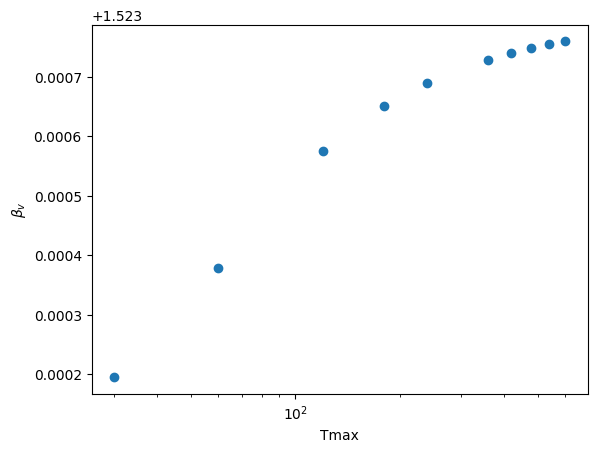

In [58]:
pl.scatter(TT, bv)

pl.xlabel('Tmax')
pl.xscale('log')
pl.ylabel(r'$\beta _v$')
# pl.yscale('log')

Text(0, 0.5, '$\\beta _v$')

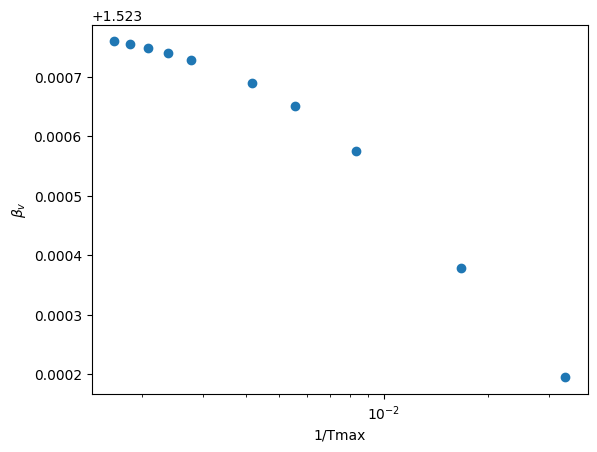

In [45]:
inverted_TT = [1/t for t in TT]

pl.scatter(inverted_TT, bv)

pl.xlabel('1/Tmax')
pl.xscale('log')
pl.ylabel(r'$\beta _v$')
# pl.yscale('log')

In [59]:
# Richardson extrapolation

fit2 = np.polyfit(inverted_TT[:-1], bv[:-1], 2, rcond=None, full=False, w=None, cov=False)
Ah = fit2[-1]

fit3 = np.polyfit(inverted_TT, bv, 2, rcond=None, full=False, w=None, cov=False)
Ah_s = fit3[-1]

print(np.abs(Ah_s - Ah))

9.693171441060855e-07


In [85]:
tTmax = TT[-2]
Tmax = TT[-1]
s = Tmax/tTmax

n = 2
A = (s**n * Ah_s - Ah)/(s**n - 1)
print(A)

1.5238125559327378


In [86]:
final_fit = np.polyfit(inverted_TT + [0.0], bv + [A], 2, rcond=None, full=False, w=None, cov=False)
print(final_fit)

[ 0.42929423 -0.03298246  1.52381558]


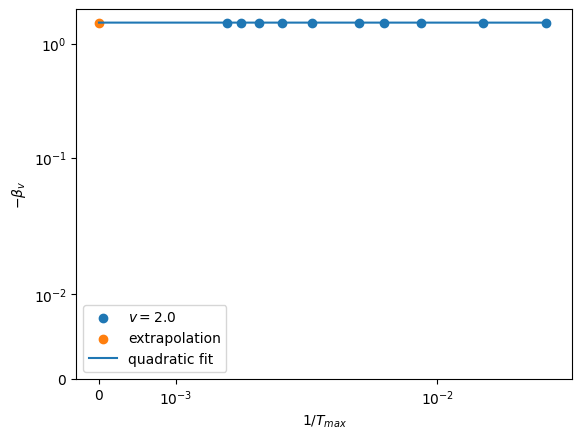

In [87]:
x = np.linspace(0.0, 0.035, num=100)
y = final_fit[0]*x**2 + final_fit[1]*x + final_fit[2]

pl.scatter(inverted_TT, bv, label=r'$v = 2.0$')
pl.scatter([0.0], [A], label='extrapolation')
pl.plot(x, y, label='quadratic fit')

pl.xlabel(r'$1/T_{max}$')
pl.xscale('symlog', linthresh=0.003)
# pl.xscale('log')
pl.ylabel(r'$-\beta _v$')
pl.yscale('symlog', linthresh=0.015)
pl.ylim(0.0, 2.0)

pl.legend()